In [1]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataFrame = pd.read_csv('dataset.csv')
#C:\\Users\\sharm\\Desktop\\dataset.csv
#'../dataset.csv'


Checking for null values in the provided dataset:

In [3]:
dataFrame.isnull().values.any()

False

Looking for possible correlations in the dataset

<AxesSubplot:>

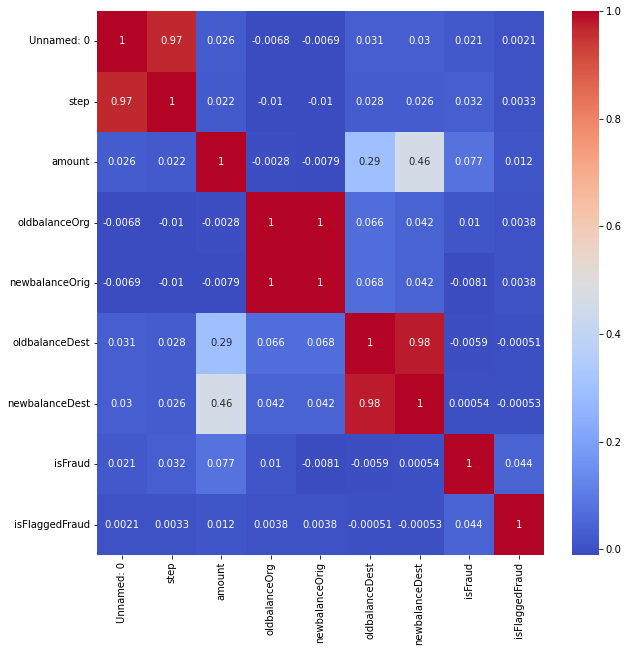

In [4]:
dataFrame.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataFrame.corr(), annot=True, cmap='coolwarm')

Checking where the frauds are occuring. We can see that they only occur only for transaction types 'CASH_OUT' and 'TRANSFER'

2151495


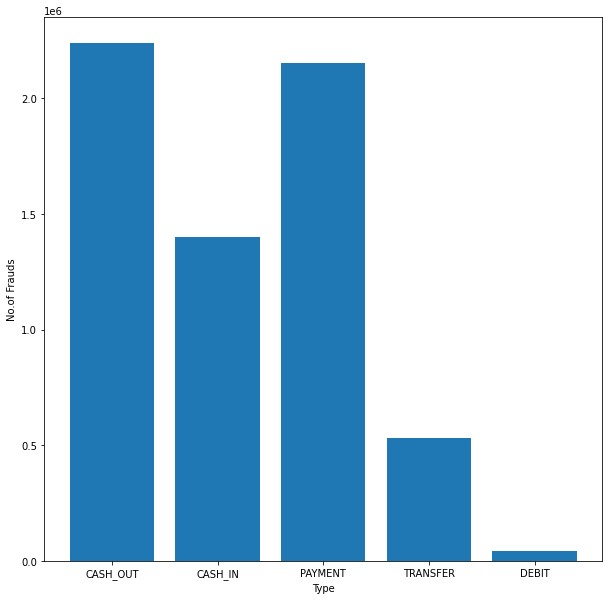

In [5]:
fraudsOut = len(dataFrame[dataFrame['type']=='CASH_OUT'])
fraudsIn = len(dataFrame[dataFrame['type']=='CASH_IN'])
fraudsPayment = len(dataFrame[dataFrame['type']=='PAYMENT'])
fraudsTransfer = len(dataFrame[dataFrame['type']=='TRANSFER'])
fraudsDebit = len(dataFrame[dataFrame['type']=='DEBIT'])
print(fraudsPayment)

plt.figure(figsize=[10,10])
numberOfFrauds = [fraudsOut, fraudsIn, fraudsPayment,fraudsTransfer, fraudsDebit ]
tick_label = ['CASH_OUT','CASH_IN','PAYMENT','TRANSFER','DEBIT']

plt.bar(tick_label,numberOfFrauds)
# plt.bar(tick_label,numberOfFrauds,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Type")
plt.ylabel("No.of Frauds")
plt.show()

Visualising to see number of types of transactions that take place.

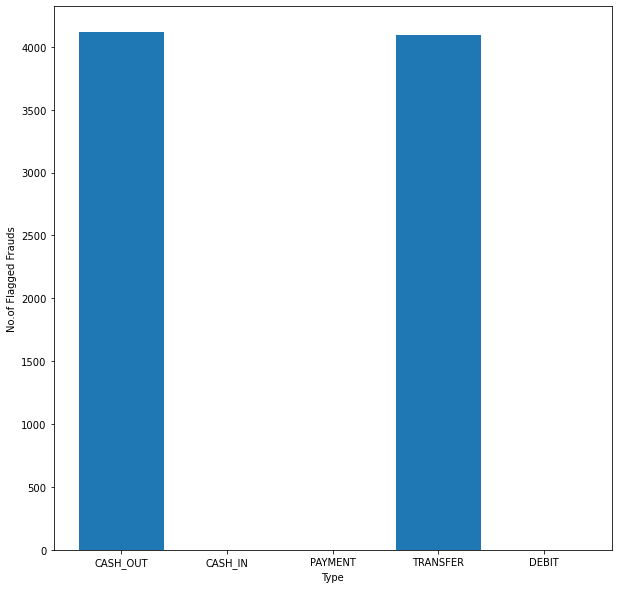

In [8]:
fraudsOut = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='CASH_OUT'])
fraudsIn = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='CASH_IN'])
fraudsPayment = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='PAYMENT'])
fraudsTransfer = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='TRANSFER'])
fraudsDebit = len(dataFrame[(dataFrame['isFraud']==1)  ][dataFrame['type']=='DEBIT'])

plt.figure(figsize=[10,10])
numberOfFrauds = [fraudsOut, fraudsIn, fraudsPayment,fraudsTransfer, fraudsDebit ]
tick_label = ['CASH_OUT','CASH_IN','PAYMENT','TRANSFER','DEBIT']
plt.bar(tick_label,numberOfFrauds)
plt.xlabel("Type")
plt.ylabel("No.of Flagged Frauds")
plt.show()

Analysing theamount of transactions when the isFlaggedFraud is set to 1 for the specific transactions. Here we can see that when the amount is >=200,000 then isFlaggedFraud is set.

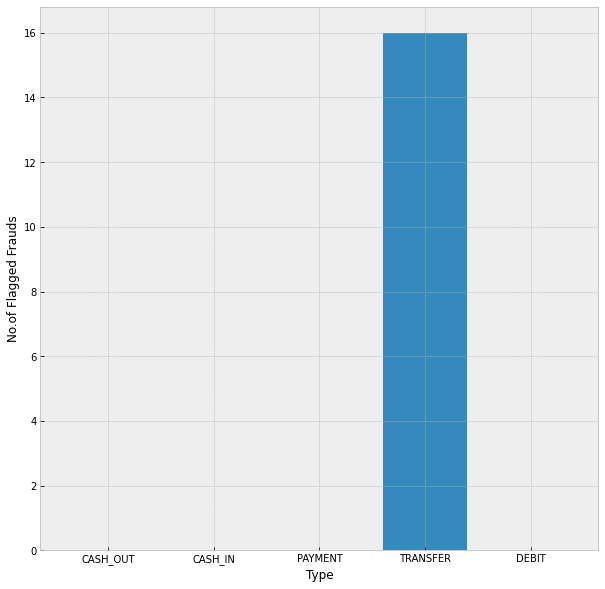

In [63]:
fraudsOut = len(dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='CASH_OUT'])
fraudsIn = len(dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='CASH_IN'])
fraudsPayment = len(dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='PAYMENT'])
fraudsTransfer = len(dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='TRANSFER'])
fraudsDebit = len(dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='DEBIT'])

plt.figure(figsize=[10,10])
numberOfFrauds = [fraudsOut, fraudsIn, fraudsPayment,fraudsTransfer, fraudsDebit ]
tick_label = ['CASH_OUT','CASH_IN','PAYMENT','TRANSFER','DEBIT']
plt.bar(tick_label,numberOfFrauds)
plt.xlabel("Type")
plt.ylabel("No.of Flagged Frauds")
plt.show()

fraudsTransfer = dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='TRANSFER']
amount = dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='TRANSFER'].amount
time = dataFrame[(dataFrame['isFlaggedFraud']==1)  ][dataFrame['type']=='TRANSFER'].step 

plt.figure(figsize=[10,10])
plt.bar(time,amount, width=20)
plt.xlabel("Time (hr)")
plt.ylabel("Amount (10 Lakh)")
plt.show()
print(amount.aggregate)
print("Hence we can coclude that isFlaggedFraud is marked only for transactions above 200,000.")

We can see from the pie chart, that the number of fraudelent transactions is way less than non-fraudulent.

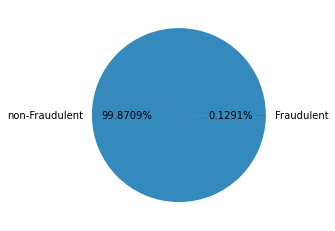

In [11]:
plt.style.use("bmh")
fraud = len(dataFrame[(dataFrame['isFraud']==1)])
nonFraud = len(dataFrame) - fraud
# print("{:.3f}".format((fraud/(nonFraud+fraud)) * 100))
# print(nonFraud)

plt.pie([nonFraud, fraud], labels=['non-Fraudulent', 'Fraudulent'], autopct='%0.4f%%')
plt.show()

Now we try finding the relation between the hours/steps and the nnumber of fraud transactions.

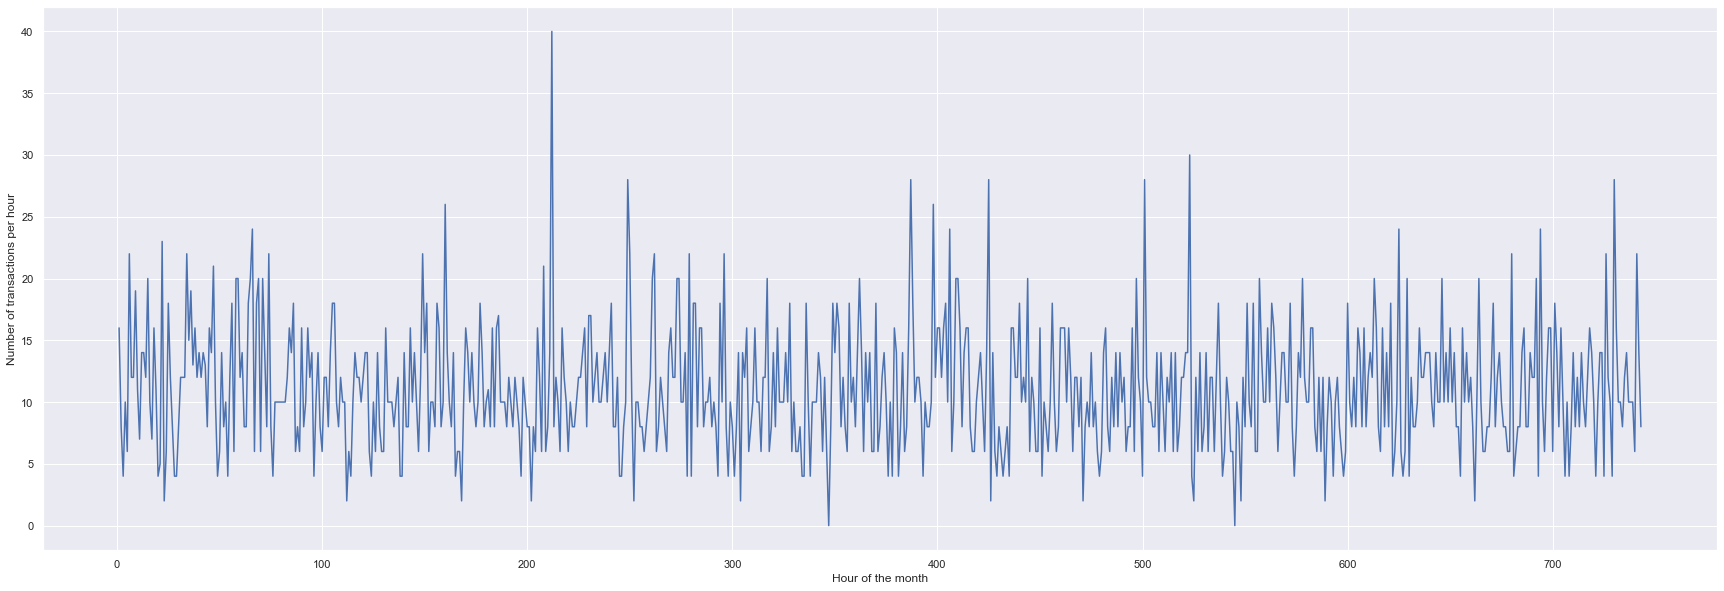

In [12]:
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x=list(range(1,744)),y=dataFrame.groupby("step")["isFraud"].sum())
plt.xlabel("Hour of the month")
plt.ylabel("Number of transactions per hour")
plt.show()

We can't find a conclusive relation above, hence lets see if the hour of the day has any relation with the occurrence of the transaction which is fraudulent.

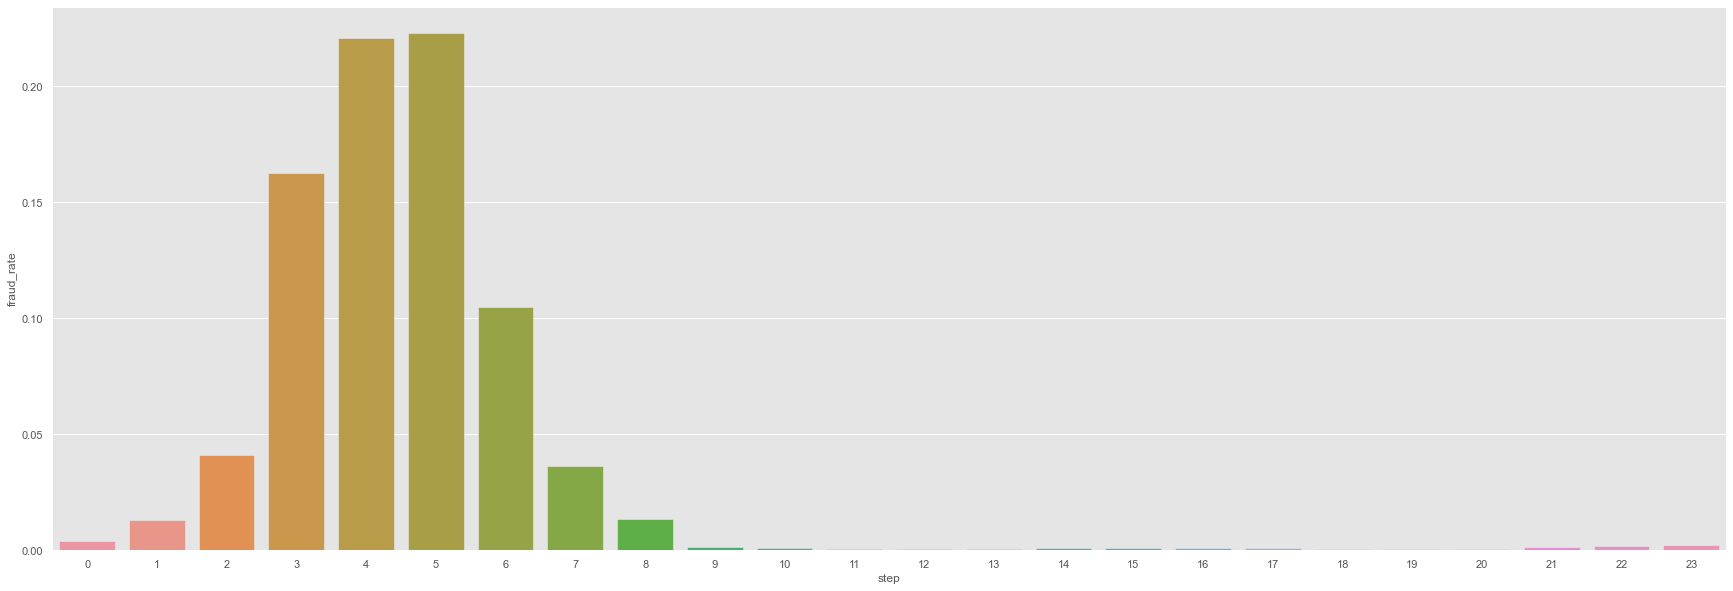

In [13]:
plt.style.use("ggplot")
dataFrame["step"] = dataFrame.step % 24
frauds_hour = pd.concat([dataFrame.groupby("step")["isFraud"].sum(),dataFrame.groupby("step")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
#sns.catplot(x=frauds_hour.index, y=frauds_hour.fraud_rate, data=dataFrame)

plt.show()

Fraud transactions do not occur when the nameDest is a merchant. Hence, we mark each transaction which has nameDest as Merchant. 

In [14]:
dataFrame['merchant'] = dataFrame['nameDest'].str.contains('M')

#dataFrame.head(10)

In [68]:
#dataFrame[['isFraud','merchant']].value_counts()

We can look at the transaction amount and customer's opening balance for fraud and non-fraud cash-out and tranfer transactions seperately. Median for these variables are compared because mean is biased because of outliers. From the plots, we can see that these variables are abnormally high for fraud cash-out transactions compared to non-fraud cash-out transactions.
We record the error in the transactions by creating two new columns, in order to record fraudulent transaction giving strength to our model.

The difference of balances of Orif and Dest can help narrow down fraudulent transactions.
As described in the dataset documentation, these transactions typically involve the fraud agent pulling large amounts out of the targeted accounts. Let's see if we can demonstrate some of these characteristics by creating and observing columns that show the change in account balances due to a transaction. We will use the convention of subtracting old balance from new, so that the difference value is positive if the account balance is higher after the transaction, and vice versa.

In [15]:
dataFrame['balancediffOrig'] = dataFrame['newbalanceOrig'] - dataFrame['oldbalanceOrg']
dataFrame['balancediffDest'] = dataFrame['newbalanceDest'] - dataFrame['oldbalanceDest']

dataFrame.head(10)

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True,-9839.64,0.00
1,1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True,-1864.28,0.00
2,2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False,-181.00,0.00
3,3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False,-181.00,-21182.00
4,4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True,-11668.14,0.00
5,5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True,-7817.71,0.00
6,6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True,-7107.77,0.00
7,7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True,-7861.64,0.00
8,8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True,-2671.00,0.00
9,9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False,-5337.77,-1549.21


Before moving to build a machine learning model, it is mandatory to pre-process the data so that the model trains without any error and can learn better to provide better results


<AxesSubplot:xlabel='isFraud', ylabel='balancediffOrig'>

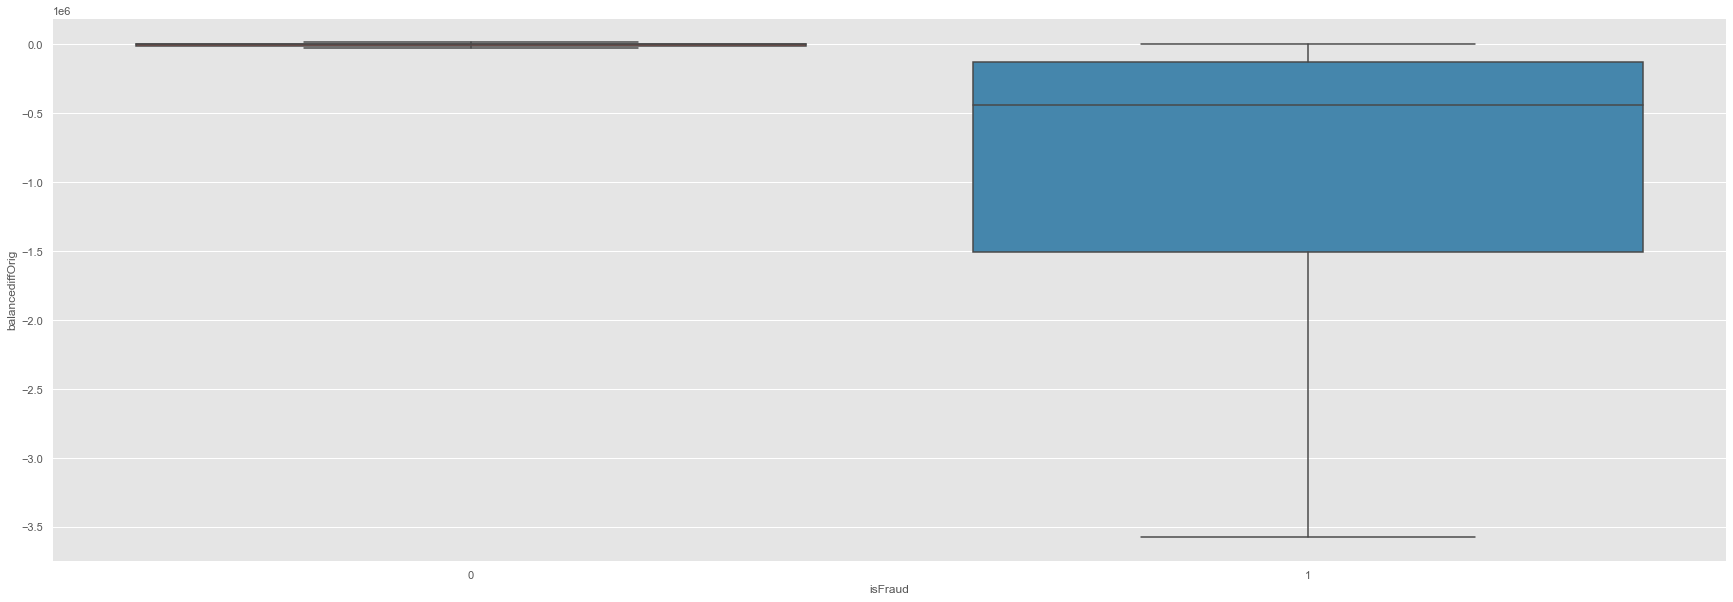

In [16]:
sns.boxplot(x="isFraud", y="balancediffOrig", data=dataFrame,showfliers=False)


<AxesSubplot:xlabel='isFraud', ylabel='balancediffDest'>

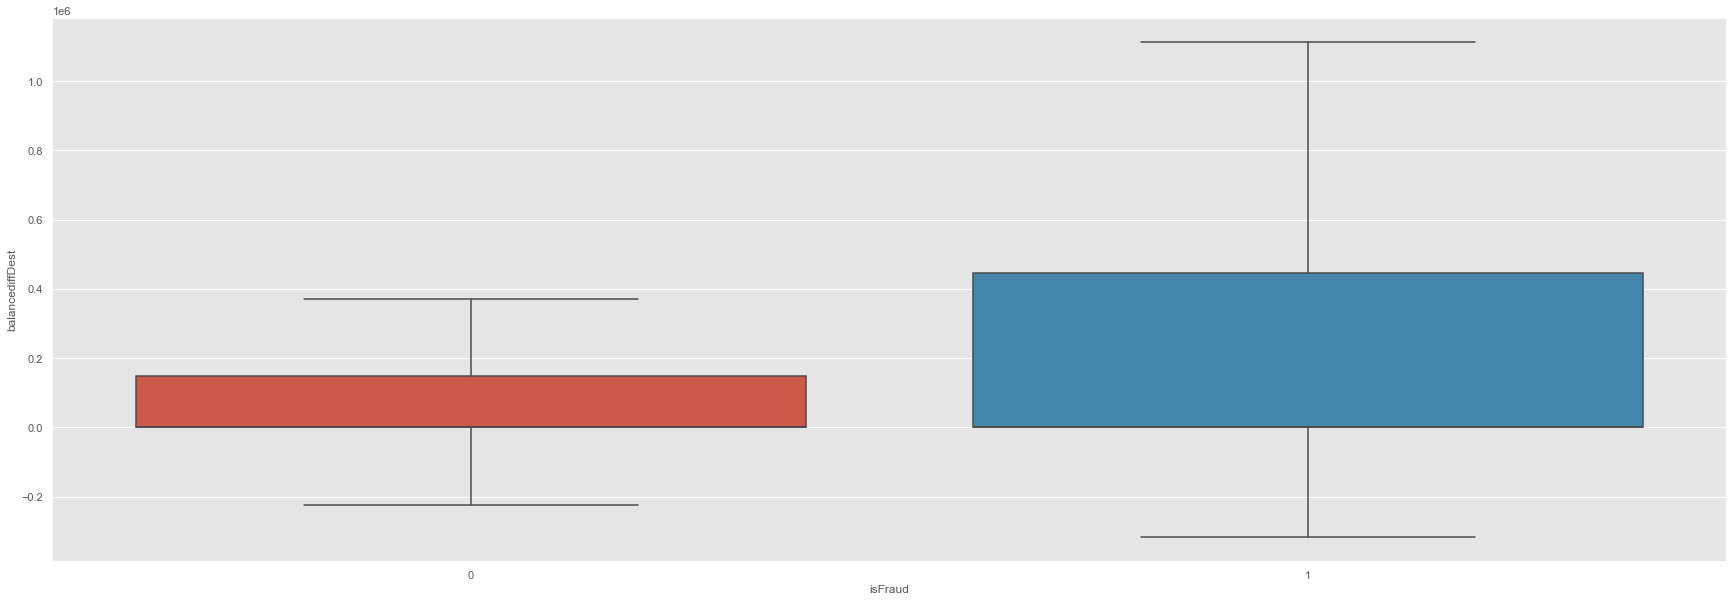

In [17]:
sns.boxplot(x="isFraud", y="balancediffDest", data=dataFrame, showfliers=False)

A commonality in these last two plots was that the balance difference values for isFraud==1 had more variance and spread. This may be because our sample size for fraudulent data is much smaller. By nature, smaller samples are likely to exhibit higher variability.

Preprocessing
We will now prepare the data for model input. Let's subset the dataframe to only select the variables we will use as model features, as well as the label for classification.



In [18]:
features = ['step',
            'type',
            'amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest',
            'balancediffOrig',
            'balancediffDest',
            'merchant']

label = ['isFraud']


#3 new columns added (last 3)

In [19]:
def surge_indicator(dataFrame):
    '''Creates a new column which sets to 1 if the transaction amount is greater than the threshold, else it will be 0'''
    dataFrame['surge']=[1 if n>450000 else 0 for n in dataFrame['amount']]

def frequency_receiver(dataFrame):
    '''Creates a new column which has 1 if the destnation account receives money from many individuals else it will be 0'''
    dataFrame['freq_Dest']=dataFrame['nameDest'].map(dataFrame['nameDest'].value_counts())
    dataFrame['freq_dest']=[1 if n>20 else 0 for n in dataFrame['freq_Dest']]
    
    dataFrame.drop(['freq_Dest'],axis=1,inplace = True)

To split and standardize, we create the independent and dependent feature, then split them into train and test data where training size is 70%. 

In [61]:
#SPLITTING TYPE INTO COLUMNS
newCol = dataFrame[features]
fraudCol = dataFrame[label]
newCol = newCol.join(pd.get_dummies(newCol[['type']], prefix='type' )).drop(['type'], axis=1)
# print(newCol.head())
newCol['step'] = newCol['step']%24
#our new step is basically the hour of the day.


#.drop is for deleting a specific column

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  balancediffOrig  balancediffDest  merchant  type_CASH_IN  \
0             0.0         -9839.64              0.0      True             0   
1             0.0         -1864.28              0.0      True             0   
2             0.0          -181.00              0.0     False             0   
3             0.0          -181.00         -21182.0     False             0   
4             0.0        -11668.14              0.0      True             0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              0           0             1              

Balancing Data:
When we are training a model with a training set like the given set for fraud transaction, we find that Amongst around ten thousands of good transactions there will be around 1-2 transactions which will be fraud.
This creates an imbalance in the data set.


In [88]:
#Creating a copy
dataF1=dataFrame.copy()

#
#Getting the max size
max_size = dataF1['isFraud'].value_counts().max()

#Balancing the target label
lst = [dataF1]
for class_index, group in dataF1.groupby('isFraud'):
    lst.append(group.sample(max_size-len(group), replace=True))
dataF1 = pd.concat(lst)

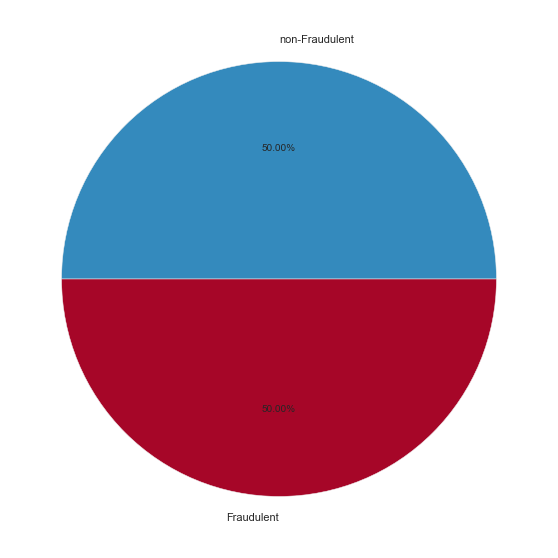

In [90]:
plt.style.use("bmh")
fraud = len(dataF1[(dataF1['isFraud']==1)])
nonFraud = len(dataF1) - fraud
# print("{:.3f}".format((fraud/(nonFraud+fraud)) * 100))
# print(nonFraud)

plt.pie([nonFraud, fraud], labels=['non-Fraudulent', 'Fraudulent'], autopct='%0.2f%%')
plt.show()

In [91]:
surge_indicator(dataF1)
dataF1['surge'].value_counts()

frequency_receiver(dataF1)
dataF1['freq_dest'].value_counts()

1    7660406
0    5048408
Name: freq_dest, dtype: int64

To split and standardize, we create the independent and dependent feature, then split them into train and test data where training size is 70%. 

In [92]:
#Splitting dependent and independent variable
dataF2=dataF1.copy()
X=dataF2.drop('isFraud',axis=1)
y=dataF2['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)

#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [93]:
#Dropping unnecessary columns
X_train=X_train.drop(['nameOrig','nameDest','isFlaggedFraud','type'],axis=1)
X_train = X_train.reset_index(drop=True)

X_test=X_test.drop(['nameOrig','nameDest','isFlaggedFraud','type'],axis=1)
X_test = X_test.reset_index(drop=True)

An advantage of using decision trees is that the results are highly interpretable and easy to visualize. This means we will be able to see exactly how the decision tree constructs itself, and what features it prioritizes in its construction. It will show us how the data is being split and by what values for each feature will lead to a certain classification.

Decesion Tree Classifier Model

In [94]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

In [95]:
# result = pd.DataFrame({'actual':y_test['isFraud'], 'predicted':y_pred})
# result[result['actual']==1]


In [96]:
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908279
           1       1.00      1.00      1.00   1904366

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

AUC: 0.9999368540973306


([<matplotlib.patches.Wedge at 0x23c145b0948>,
 [Text(-1.0999999783312246, 0.00021833759606078797, 'Accurate'),
  Text(1.4999999704189053, -0.0002978981095514873, 'Inaccurate')],
 [Text(-0.5999999881806679, 0.00011909323421497525, '99.993681908%'),
  Text(0.9999999802792701, -0.0001985987397009915, '0.006314590%')])

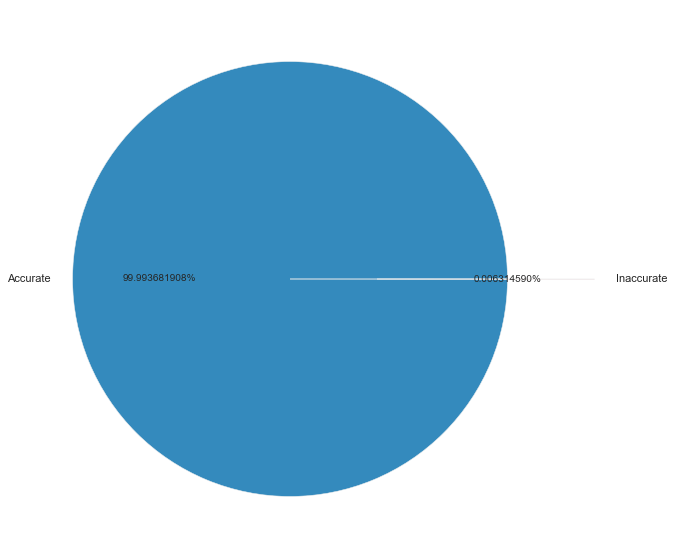

In [97]:
predicted=metrics.auc(fpr, tpr)*100
actual=100
plt.style.use("bmh")

lable=['Accurate','Inaccurate']
val=[predicted,actual-predicted]
explode=[0,0.4]
plt.pie(val,labels=lable,autopct='%1.9f%%',explode=explode)

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9999367892893254
Precision: 0.9998734647095175
Recall: 1.0


Hence, our model has an accuracy of 0.99989%.

In [99]:
importance = pd.DataFrame({'features':X_train.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False) 
importance

,features,importance
11,freq_dest,0.658965
8,balancediffOrig,0.242615
2,amount,0.065740
4,newbalanceOrig,0.013960
5,oldbalanceDest,0.005877
3,oldbalanceOrg,0.004265
0,Unnamed: 0,0.003698
9,balancediffDest,0.002509
6,newbalanceDest,0.001571
1,step,0.000800


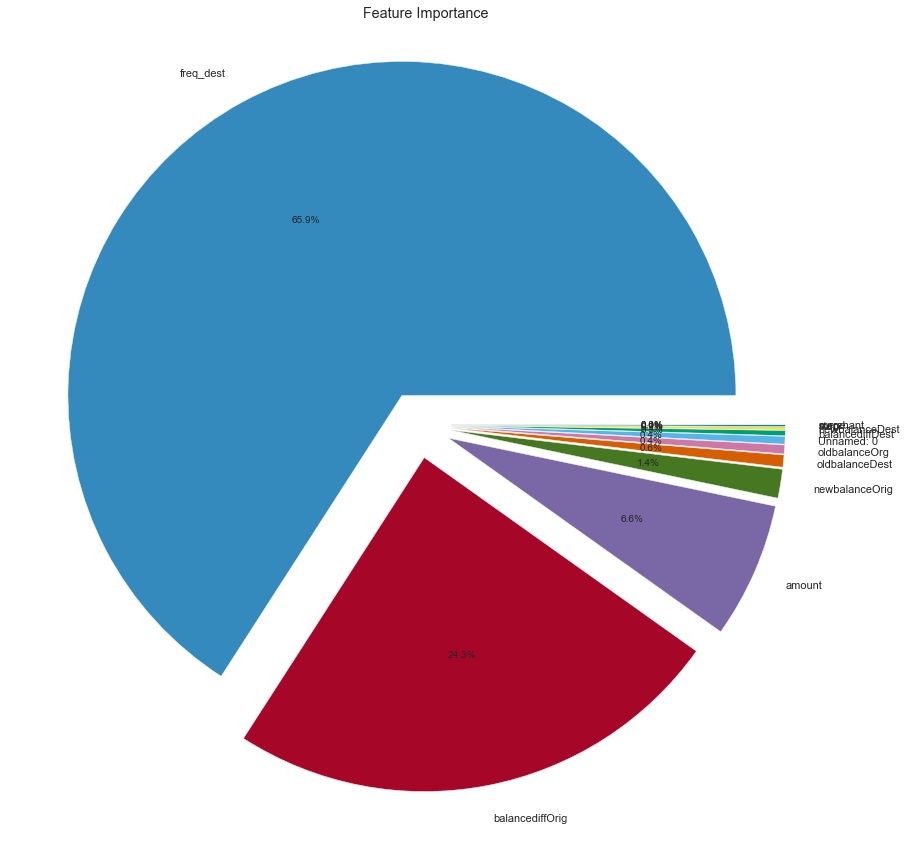

In [100]:
plt.style.use("bmh")
f = importance['features'] 
i = importance['importance']

# my_data = [value1,value2,value3,...]
# my_labels = 'label1','label2','label3',...

plt.figure(figsize=[15,15])
my_explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(i,labels=f,autopct='%1.1f%%',shadow=False,explode=my_explode)
plt.title('Feature Importance')
plt.axis('equal')
plt.show()

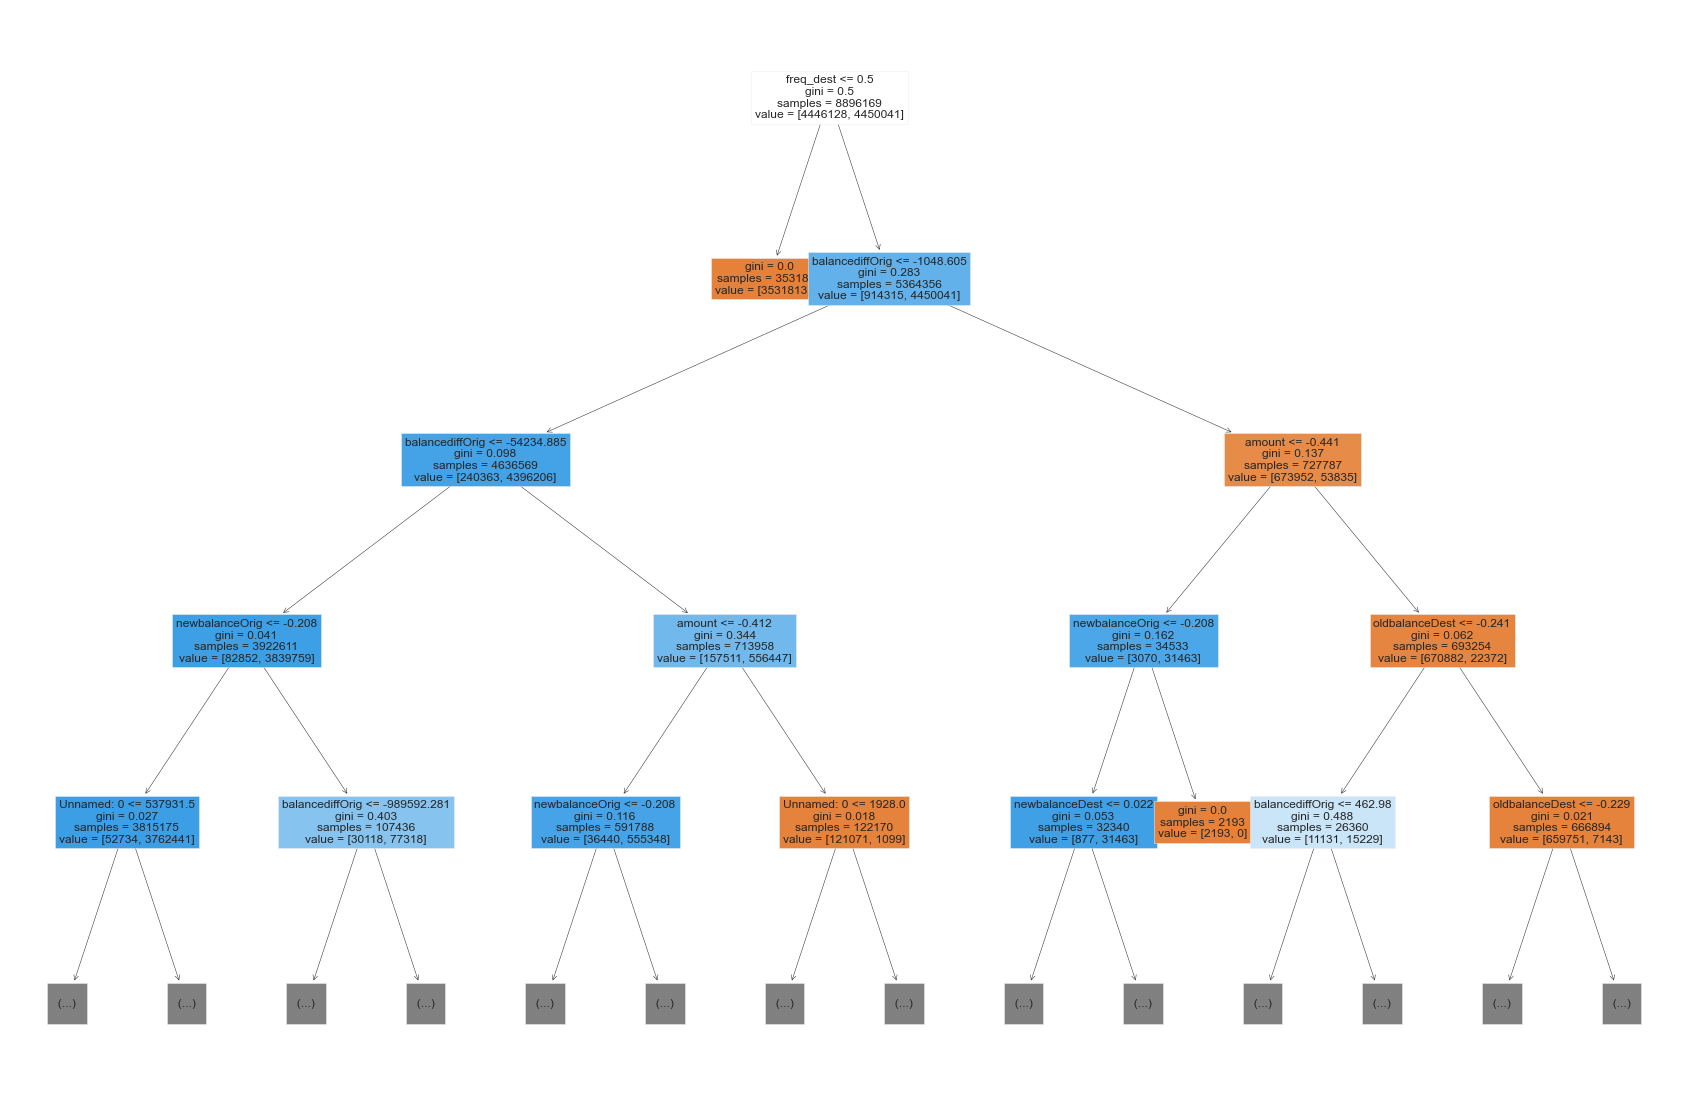

In [106]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
_ = plot_tree(dt_clf, max_depth=4, feature_names=list(X_train.columns), filled=True, fontsize=12)

This tells us that the most influential features to the model are balance changes and amount. Whether or not the transaction is a transfer is also important. This confirms our earlier supposition based on the data documentation that fraudulent transactions are often characterized by transfers of large amounts. On the other hand, if a transaction is not a transfer, type appears to be mostly irrelevant. Whether or not a merchant account is involved is also unimportant.

In [108]:
rfc = RandomForestClassifier(random_state=1)

In [ ]:
rfc = rfc.fit(X_train,y_train)


In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))